TASK 1: DATA EXPLORATION


First few rows of the dataset:


Wine  Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids  \
0     1    14.23        1.71  2.43  15.6  127     2.80        3.06   
1     1    13.20        1.78  2.14  11.2  100     2.65        2.76   
2     1    13.16        2.36  2.67  18.6  101     2.80        3.24   
3     1    14.37        1.95  2.50  16.8  113     3.85        3.49   
4     1    13.24        2.59  2.87  21.0  118     2.80        2.69   

   Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  Proline  
0                  0.28     2.29       5.64  1.04  3.92     1065  
1                  0.26     1.28       4.38  1.05  3.40     1050  
2                  0.30     2.81       5.68  1.03  3.17     1185  
3                  0.24     2.18       7.80  0.86  3.45     1480  
4                  0.39     1.82       4.32  1.04  2.93      735


Basic statistics of the dataset:


Wine     Alcohol  Malic.acid         Ash         Acl          Mg  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          Phenols  Flavanoids  Nonflavanoid.phenols     Proanth   Color.int  \
count  178.000000  178.000000            178.000000  178.000000  178.000000   
mean     2.295112    2.029270              0.361854    1.590899    5.058090   
std      0.625851    0.998859              0.124453    0.572359    2.318286   
min      0.980000    0.340000              0.130000    0.410000    1.280000   
25%      1.742500    1.205000              0.270000    1.250000    3.220000   
50%      2.355000    2.135000              0.340000    1.555000    4.690000   
75%      2.800000    2.875000              0.437500    1.950000    6.200000   
max      3.880000    5.080000              0.660000    3.580000   13.000000   

              Hue          OD      Proline  
count  178.000000  178.000000   178.000000  
mean     0.957449    2.611685   746.893258  
std      0.228572    0.709990   314.907474  
min      0.480000    1.270000   278.000000  
25%      0.782500    1.937500   500.500000  
50%      0.965000    2.780000   673.500000  
75%      1.120000    3.170000   985.000000  
max      1.710000    4.000000  1680.000000


Checking for missing values:


Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64


Histograms of Wine Features:


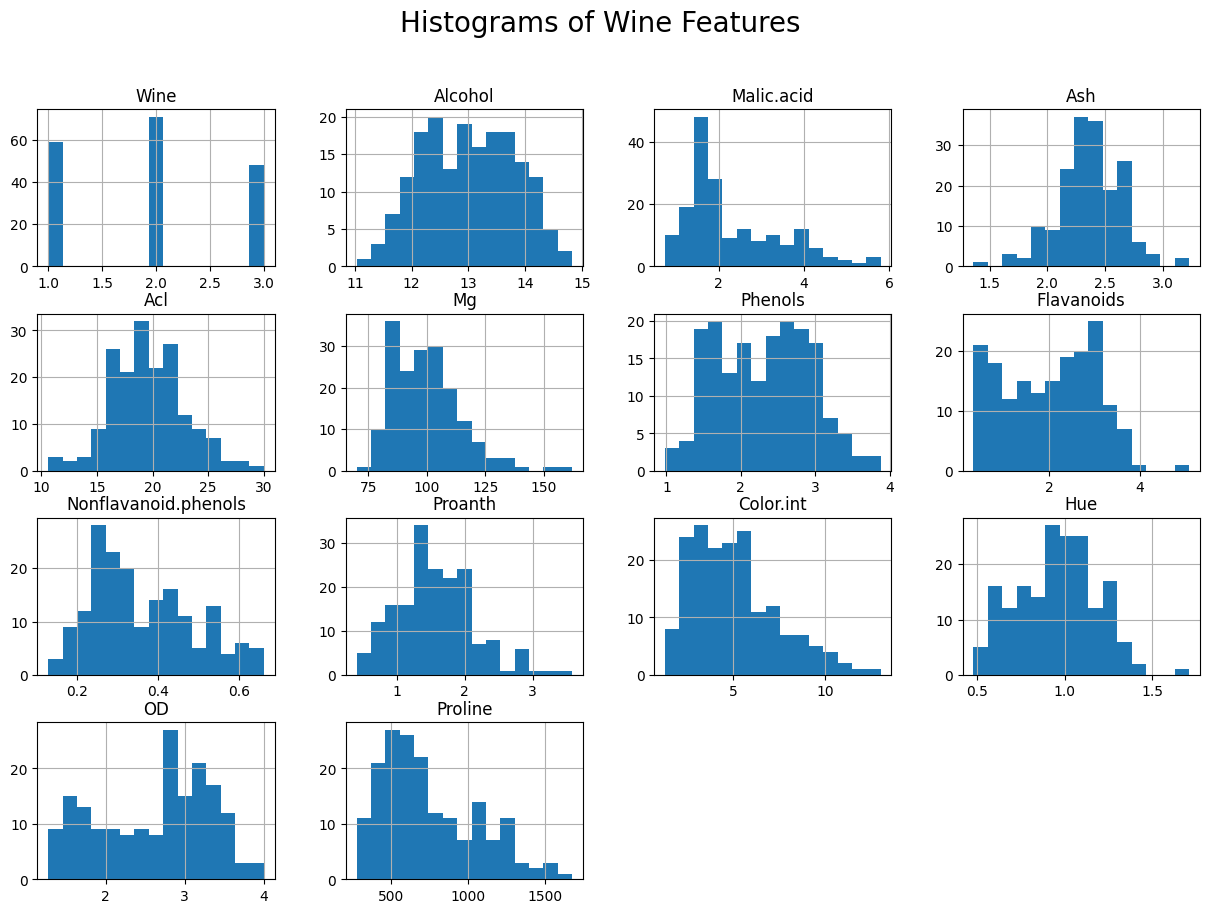


Scatter Plot Matrix of Wine Features:


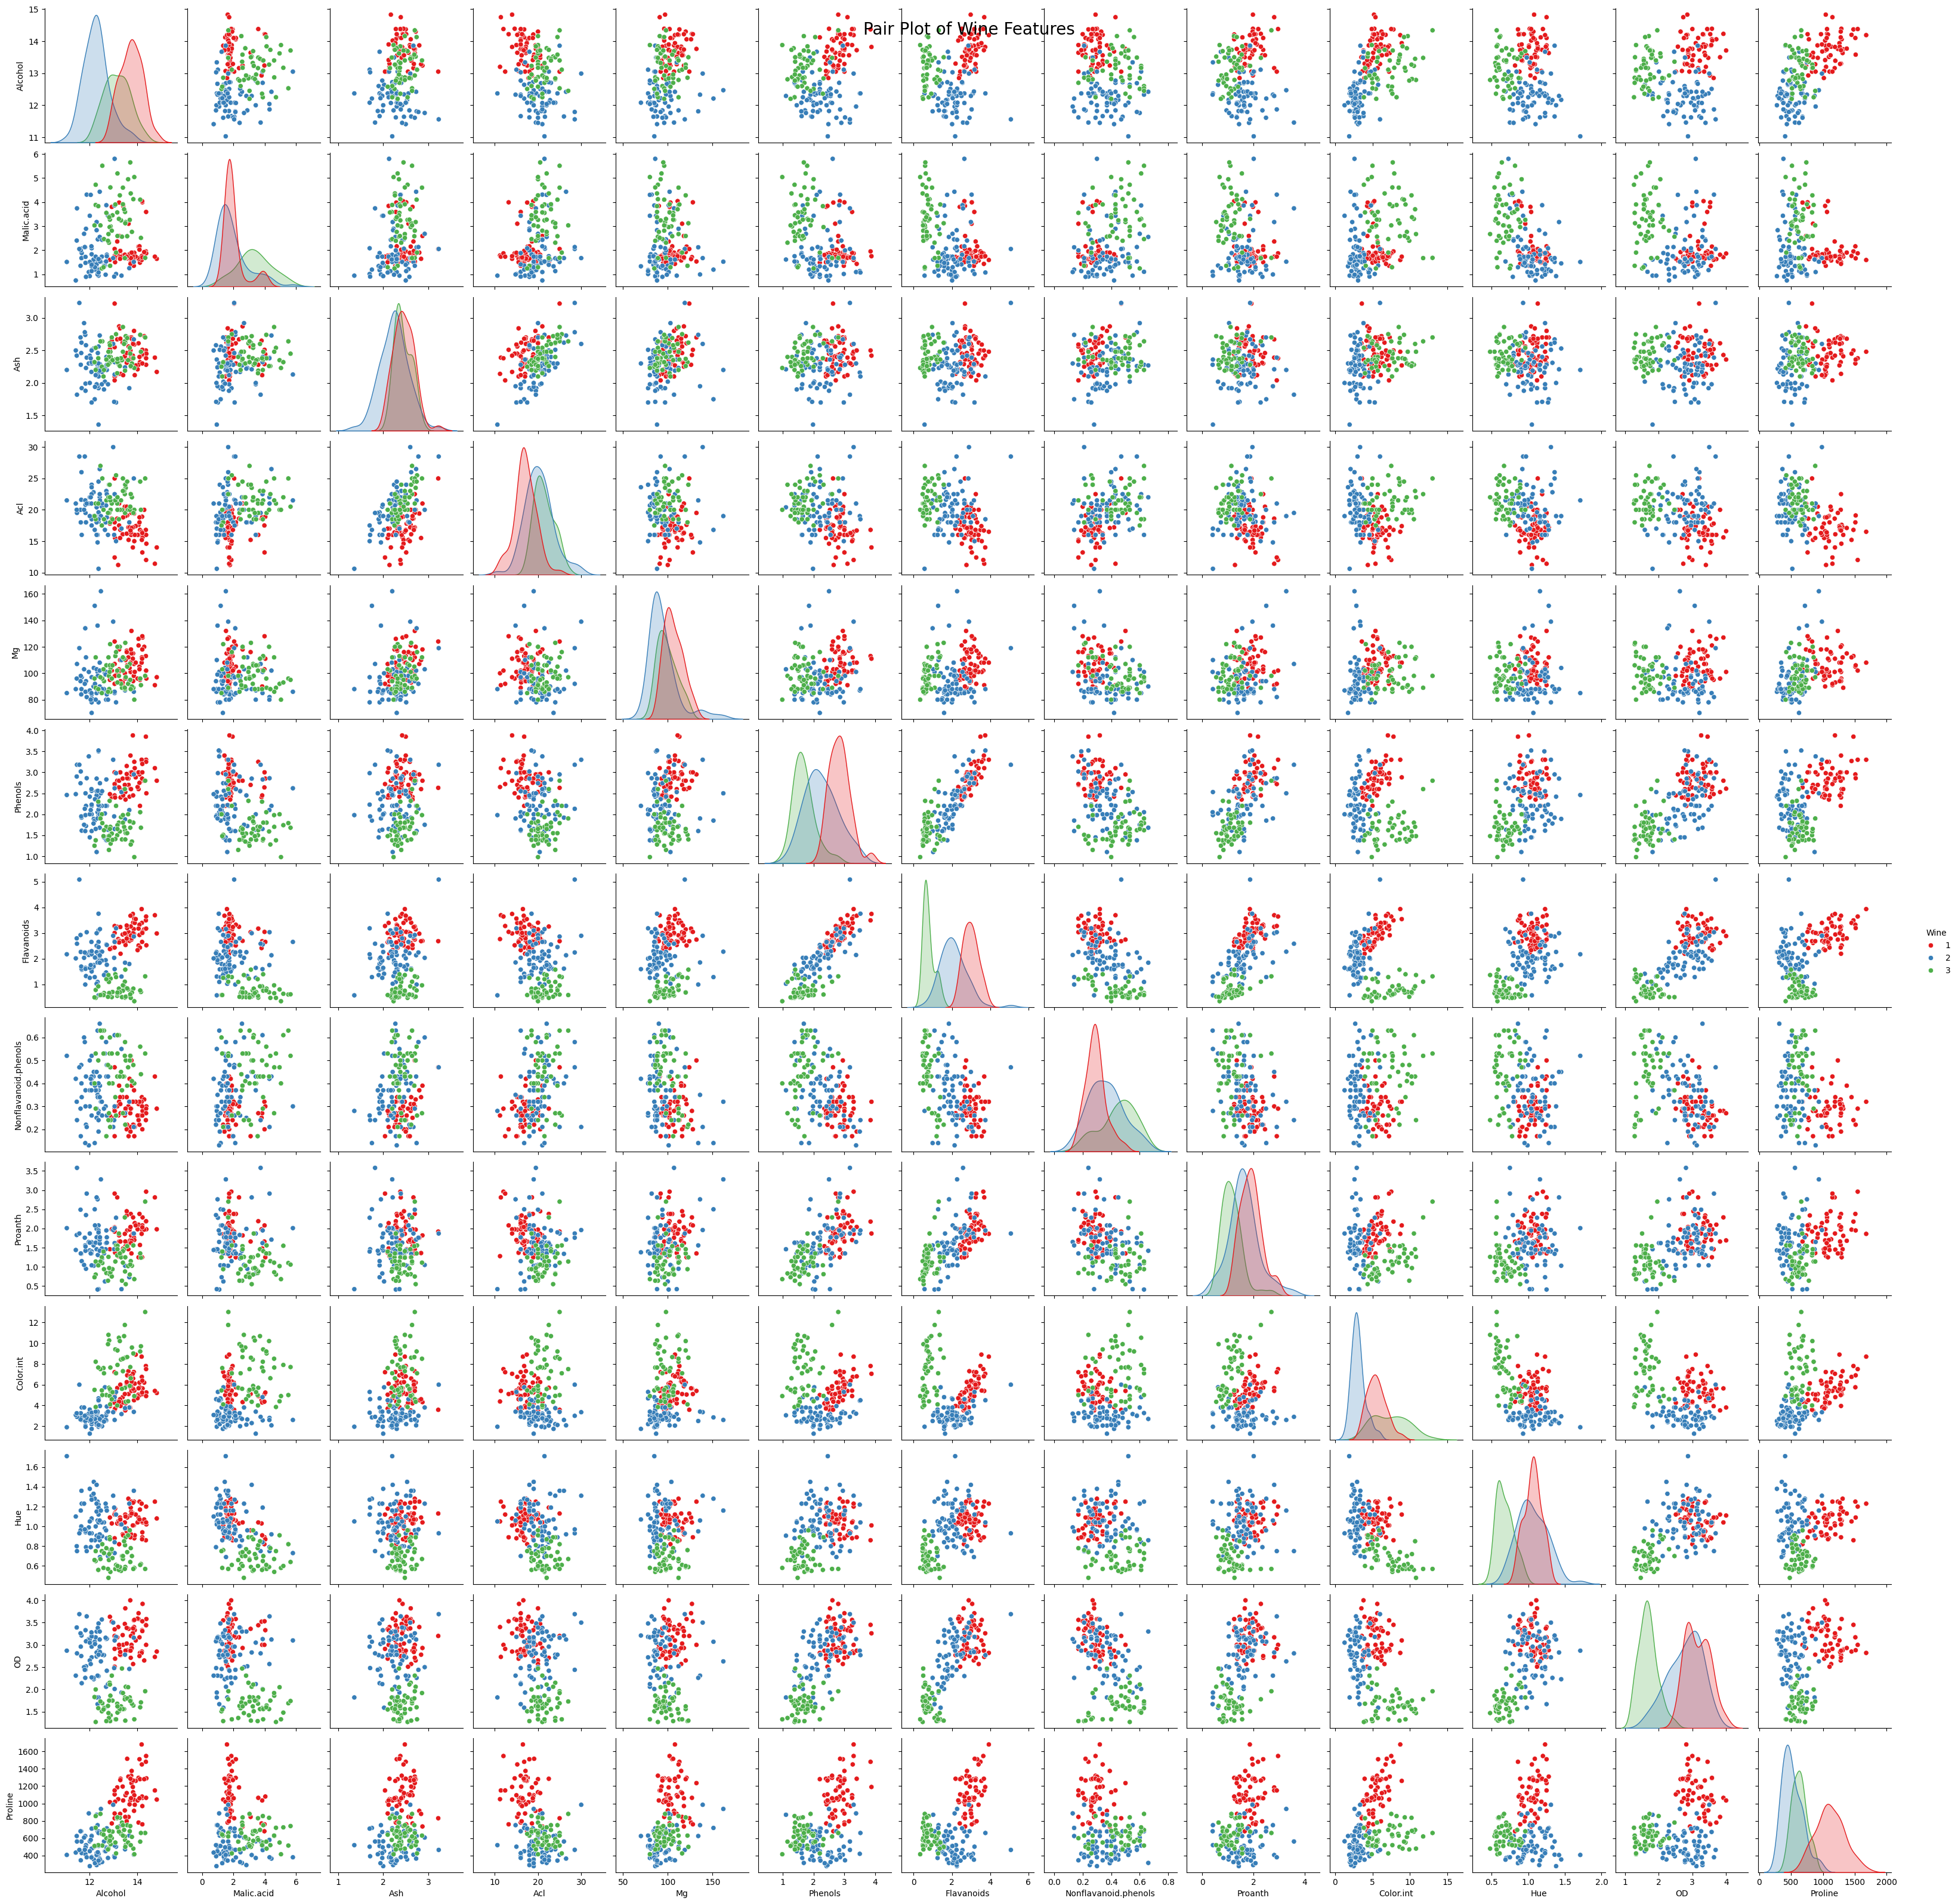

In [10]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#load the wine dataset from the csv file

df = pd.read_csv("/wine.csv")


# Display the first few rows of the dataframe
print("First few rows of the dataset:")
display(df.head())

# Basic statistics of the dataset
print("\nBasic statistics of the dataset:")
display(df.describe())

# Checking for missing values
print("\nChecking for missing values:")
display(df.isnull().sum())

# Visualizing the dataset

# Histograms
print("\nHistograms of Wine Features:")
df.hist(bins=15, figsize=(15, 10))
plt.suptitle('Histograms of Wine Features', size=20)
plt.show()

# Scatter plot matrix
print("\nScatter Plot Matrix of Wine Features:")
sns.pairplot(df, hue='Wine', palette='Set1')
plt.suptitle('Pair Plot of Wine Features', size=20)
plt.show()

TASK 2: DATA PREPROCESSING


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separating features and target variable
X = df.drop('Wine', axis=1)
y = df['Wine']

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the resulting datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (142, 13)
Shape of X_test: (36, 13)
Shape of y_train: (142,)
Shape of y_test: (36,)


TASK 3: MODEL SELECTION

In [13]:
# Task 3: Model Selection

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the models
decision_tree = DecisionTreeClassifier(random_state=42)
svm = SVC(random_state=42)

# Train the models on the training dataset
decision_tree.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Make predictions on the test dataset
y_pred_dt = decision_tree.predict(X_test)
y_pred_svm = svm.predict(X_test)

# Evaluating the models
print("Decision Tree Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

print("\nSupport Vector Machine Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


Decision Tree Classifier Performance:
Accuracy: 0.9444444444444444
Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.92      0.96        12
           2       0.88      1.00      0.93        14
           3       1.00      0.90      0.95        10

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36

Confusion Matrix:
 [[11  1  0]
 [ 0 14  0]
 [ 0  1  9]]

Support Vector Machine Classifier Performance:
Accuracy: 0.9722222222222222
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       0.93      1.00      0.97        14
           3       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97  

TASK 4: MODEL EVALUATION

Decision Tree Classifier Performance:
Accuracy: 0.9444444444444444
Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.92      0.96        12
           2       0.88      1.00      0.93        14
           3       1.00      0.90      0.95        10

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36

Confusion Matrix:
 [[11  1  0]
 [ 0 14  0]
 [ 0  1  9]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


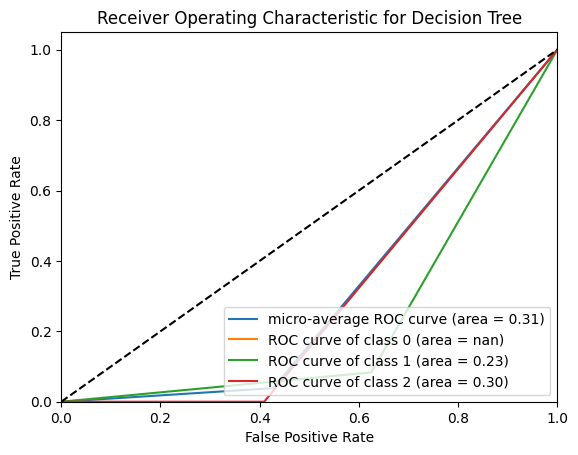


Support Vector Machine Classifier Performance:
Accuracy: 0.9722222222222222
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       0.93      1.00      0.97        14
           3       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36

Confusion Matrix:
 [[12  0  0]
 [ 0 14  0]
 [ 0  1  9]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


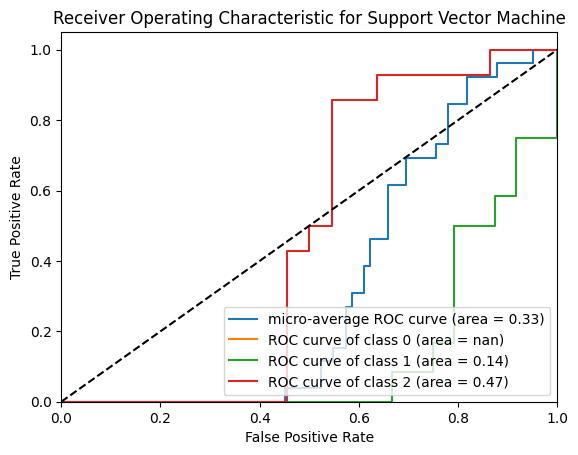

In [14]:
# Task 4: Model Evaluation

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Function to plot ROC curves
def plot_roc_curve(y_test, y_score, n_classes, model_name):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                       ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic for {model_name}')
    plt.legend(loc="lower right")
    plt.show()

# Binarize the output for ROC curves
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Decision Tree: Predict probabilities
y_score_dt = decision_tree.predict_proba(X_test)

# Support Vector Machine: Use decision function
y_score_svm = svm.decision_function(X_test)

# Evaluate Decision Tree
print("Decision Tree Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

# Plot ROC curve for Decision Tree
plot_roc_curve(y_test_bin, y_score_dt, n_classes, "Decision Tree")

# Evaluate Support Vector Machine
print("\nSupport Vector Machine Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

# Plot ROC curve for Support Vector Machine
plot_roc_curve(y_test_bin, y_score_svm, n_classes, "Support Vector Machine")


TASK 5: MODEL COMPARISON


In [19]:
# Task 5: Model Comparison

# Compare Accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print("Model Comparison:")
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print(f"Support Vector Machine Accuracy: {accuracy_svm:.4f}")

# Compare other metrics from the classification reports
report_dt = classification_report(y_test, y_pred_dt, output_dict=True)
report_svm = classification_report(y_test, y_pred_svm, output_dict=True)

# Compare Precision, Recall, and F1-score
precision_dt = report_dt['weighted avg']['precision']
recall_dt = report_dt['weighted avg']['recall']
f1_score_dt = report_dt['weighted avg']['f1-score']

precision_svm = report_svm['weighted avg']['precision']
recall_svm = report_svm['weighted avg']['recall']
f1_score_svm = report_svm['weighted avg']['f1-score']

print(f"\nDecision Tree - Precision: {precision_dt:.4f}, Recall: {recall_dt:.4f}, F1-score: {f1_score_dt:.4f}")
print(f"Support Vector Machine - Precision: {precision_svm:.4f}, Recall: {recall_svm:.4f}, F1-score: {f1_score_svm:.4f}")

# Discuss the performance of the models
best_model = "Decision Tree" if accuracy_dt > accuracy_svm else "Support Vector Machine"
print(f"\nThe {best_model} model performed the best based on accuracy.")



Model Comparison:
Decision Tree Accuracy: 0.9444
Support Vector Machine Accuracy: 0.9722

Decision Tree - Precision: 0.9514, Recall: 0.9444, F1-score: 0.9450
Support Vector Machine - Precision: 0.9741, Recall: 0.9722, F1-score: 0.9720

The Support Vector Machine model performed the best based on accuracy.


TASK 6: INTERPRETATION

Feature Importances for Decision Tree:


Feature  Importance
6                Phenols    0.408073
9                Proanth    0.400189
12                    OD    0.110985
11                   Hue    0.020986
3                    Ash    0.020865
2             Malic.acid    0.020163
1                Alcohol    0.018738
0                   Wine    0.000000
4                    Acl    0.000000
5                     Mg    0.000000
7             Flavanoids    0.000000
8   Nonflavanoid.phenols    0.000000
10             Color.int    0.000000

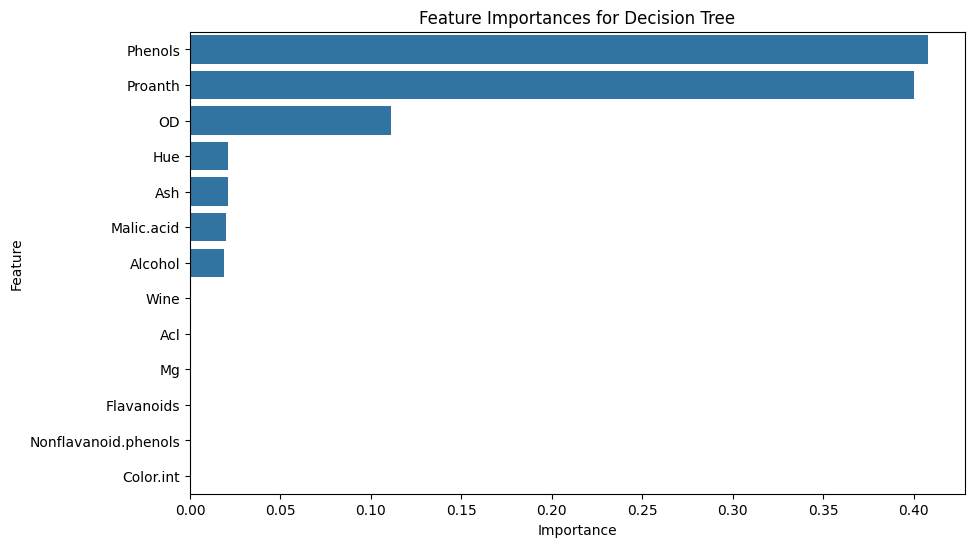

In [18]:
# Feature importances for Decision Tree
feature_importances_dt = decision_tree.feature_importances_
features = df.columns[:-1]
importances_dt = pd.DataFrame({'Feature': features, 'Importance': feature_importances_dt})
importances_dt = importances_dt.sort_values(by='Importance', ascending=False)

print("Feature Importances for Decision Tree:")
display(importances_dt)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances_dt)
plt.title('Feature Importances for Decision Tree')
plt.show()
